# End-to-End Machine Learning Project

Welcome to my Machine Learning Project, where I will show the end-to-end workflow for building a Predictive Machine Learning Algorithm on a given dataset to predict values. In this case, we will be looking at the Housing Dataset from a former Kaggle Competition, and attempting to predict the selling price for houses in Ames, Iowa.

This is a perfect representation of the end-to-end workflow for implementing a machine learning algorithm for a value-added insight, whether in the form of a predicted value, or a predicted outcome, and what it can provide for organizations across any industry/field. Again, we are using housing, as it is an accessible representation which we can use a wide array of machine learning techniques on, so as to provide the reader with many examples of the options a Machine Learning Engineer or Data Scientist has in providing valuable insights to add value to any organization.

## 1. Importing our Modules and Reading in our Dataset

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  


In [115]:
train_df = pd.read_csv(r'E:\LinkedIn Project\Project-repo\data\house-prices-advanced-regression-techniques\train.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 2. Exploratory Data Analysis

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

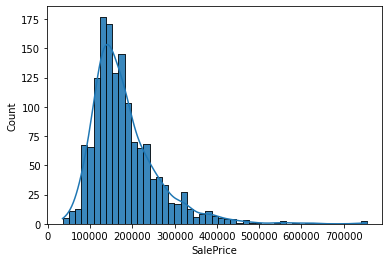

In [116]:
sns.histplot(data=train_df, x="SalePrice")
sns.histplot(data=train_df, x="SalePrice", kde=True)

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

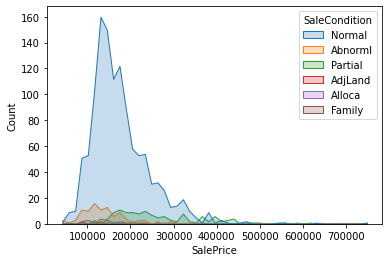

In [117]:
sns.histplot(data=train_df, x="SalePrice", hue="SaleCondition",element="poly")

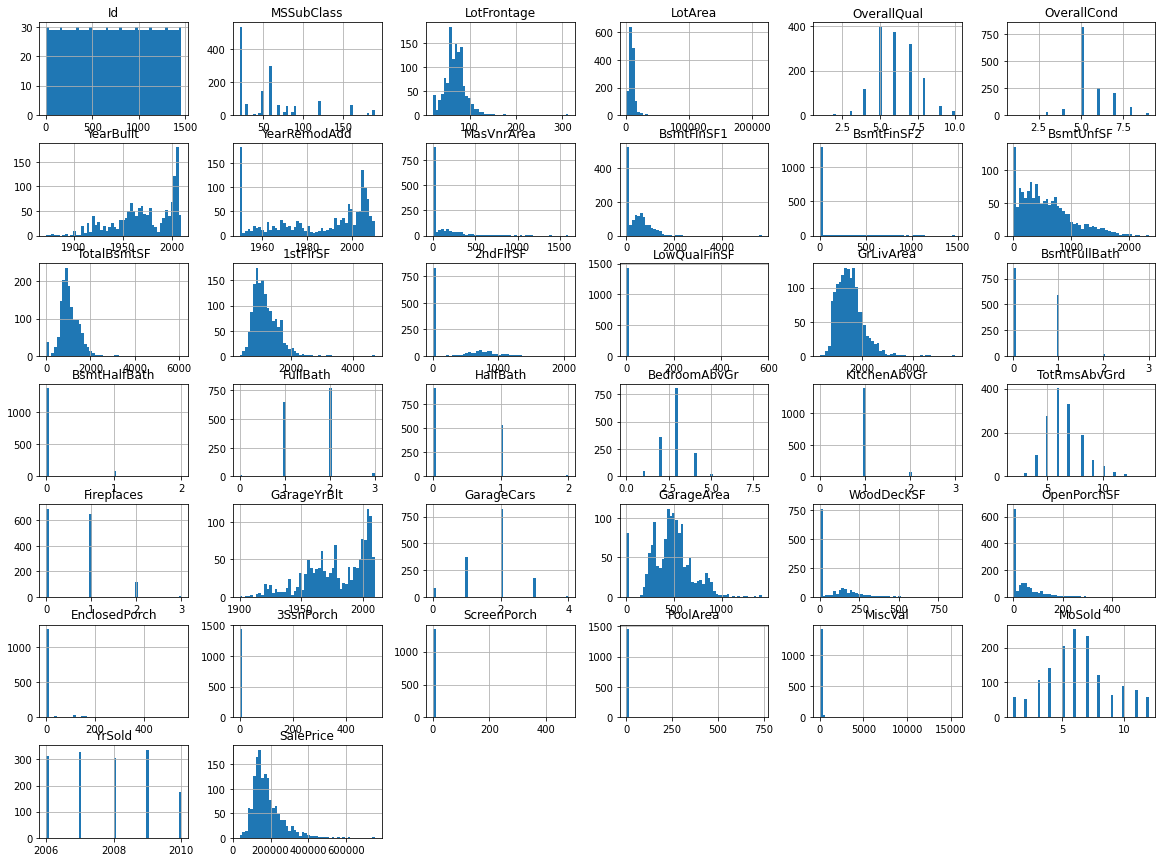

In [118]:
%matplotlib inline
import matplotlib.pyplot as plt
train_df.hist(bins=50, figsize=(20,15))
plt.show()

## 3. Data Wrangling and Cleaning 

As we will show below, we have quite a few null values. In this case, given the size of the dataset, I will go ahead and pull our nulls out of the dataset to be able to investigate each individually, and choose a course of action. We will likely find that many of the nulls simply need to be a "None" or "Does not have this"

In [119]:
from sklearn.model_selection import train_test_split

X = train_df.drop(['SalePrice'], axis=1)
y = train_df['SalePrice']
#X.info()
#y.isnull().sum()

In [120]:
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [121]:
list(train_df.columns)

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [122]:
train_df['LotFrontage'].isnull().sum()
train_df['LotFrontage'].head(15)

0     65.0
1     80.0
2     68.0
3     60.0
4     84.0
5     85.0
6     75.0
7      NaN
8     51.0
9     50.0
10    70.0
11    85.0
12     NaN
13    91.0
14     NaN
Name: LotFrontage, dtype: float64

In [123]:
train_df.loc[train_df['LotFrontage'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,20,RL,NaN,12546,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2007,WD,Normal,182900
1431,1432,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,143750
1441,1442,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,149300
1443,1444,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,121000


In [124]:
train_df['LotFrontage'].fillna(0, inplace=True)
train_df['LotFrontage'].isnull().sum()

0

In [125]:
null_list = train_df.columns[train_df.isnull().any()].tolist()
print(null_list)

['Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [126]:
null_df = train_df[null_list].copy()

In [127]:
null_df.head(15)

,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
5,NaN,None,0.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,1993.0,Unf,TA,TA,NaN,MnPrv,Shed
6,NaN,Stone,186.0,Ex,TA,Av,GLQ,Unf,SBrkr,Gd,Attchd,2004.0,RFn,TA,TA,NaN,NaN,NaN
7,NaN,Stone,240.0,Gd,TA,Mn,ALQ,BLQ,SBrkr,TA,Attchd,1973.0,RFn,TA,TA,NaN,NaN,Shed
8,NaN,None,0.0,TA,TA,No,Unf,Unf,FuseF,TA,Detchd,1931.0,Unf,Fa,TA,NaN,NaN,NaN
9,NaN,None,0.0,TA,TA,No,GLQ,Unf,SBrkr,TA,Attchd,1939.0,RFn,Gd,TA,NaN,NaN,NaN


In [128]:
null_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Alley         91 non-null     object 
 1   MasVnrType    1452 non-null   object 
 2   MasVnrArea    1452 non-null   float64
 3   BsmtQual      1423 non-null   object 
 4   BsmtCond      1423 non-null   object 
 5   BsmtExposure  1422 non-null   object 
 6   BsmtFinType1  1423 non-null   object 
 7   BsmtFinType2  1422 non-null   object 
 8   Electrical    1459 non-null   object 
 9   FireplaceQu   770 non-null    object 
 10  GarageType    1379 non-null   object 
 11  GarageYrBlt   1379 non-null   float64
 12  GarageFinish  1379 non-null   object 
 13  GarageQual    1379 non-null   object 
 14  GarageCond    1379 non-null   object 
 15  PoolQC        7 non-null      object 
 16  Fence         281 non-null    object 
 17  MiscFeature   54 non-null     object 
dtypes: float64(2), object(16)
me

In [129]:
null_df.loc[null_df['Alley'].isnull() == False]

,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
21,Grvl,None,0.0,TA,TA,No,Unf,Unf,FuseF,Gd,Attchd,1930.0,Unf,TA,TA,NaN,GdPrv,NaN
30,Pave,None,0.0,TA,TA,No,Unf,Unf,SBrkr,NaN,Detchd,1920.0,Unf,TA,Fa,NaN,MnPrv,NaN
56,Pave,BrkFace,456.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,1999.0,Fin,TA,TA,NaN,NaN,NaN
79,Grvl,None,0.0,TA,TA,No,Unf,Unf,SBrkr,NaN,Detchd,1966.0,Unf,TA,TA,NaN,MnPrv,NaN
87,Pave,Stone,76.0,Gd,TA,Av,Unf,Unf,SBrkr,NaN,Detchd,2009.0,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,Grvl,None,0.0,TA,TA,No,Unf,Unf,SBrkr,NaN,Detchd,1998.0,Unf,TA,TA,NaN,MnPrv,NaN
1414,Pave,None,0.0,TA,TA,No,Unf,Unf,SBrkr,Gd,Detchd,1922.0,Unf,TA,TA,NaN,NaN,NaN
1427,Grvl,None,0.0,TA,TA,No,BLQ,Unf,FuseA,TA,Attchd,1962.0,Unf,TA,TA,NaN,NaN,NaN
1432,Grvl,None,0.0,TA,TA,No,Unf,Unf,SBrkr,NaN,Detchd,1928.0,Unf,Fa,Fa,NaN,NaN,NaN


In [130]:
null_df['Alley'].fillna("No Alley", inplace=True)

In [131]:
null_df['MasVnrType'].fillna("No Masonry", inplace=True) # MasVnrType: Masonry veneer type

In [132]:
null_df.loc[null_df['FireplaceQu'].isnull() == False]

,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
1,No Alley,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,No Alley,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,No Alley,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,No Alley,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
6,No Alley,Stone,186.0,Ex,TA,Av,GLQ,Unf,SBrkr,Gd,Attchd,2004.0,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,No Alley,BrkFace,438.0,Gd,TA,No,GLQ,Unf,SBrkr,TA,Attchd,1995.0,RFn,TA,TA,NaN,NaN,NaN
1451,No Alley,Stone,194.0,Gd,TA,No,Unf,Unf,SBrkr,Gd,Attchd,2008.0,Fin,TA,TA,NaN,NaN,NaN
1455,No Alley,None,0.0,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,1999.0,RFn,TA,TA,NaN,NaN,NaN
1456,No Alley,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,1978.0,Unf,TA,TA,NaN,MnPrv,NaN


In [133]:
null_df['FireplaceQu'].fillna("No Fireplace", inplace=True) # FireplaceQu: Fireplace quality


In [134]:
null_df['PoolQC'].fillna("No Pool", inplace=True) # PoolQC: Pool quality  NA	No Pool
null_df['Fence'].fillna("No Fence", inplace=True) 



In [135]:
#  10  GarageType    1379 non-null   object 
#  11  GarageYrBlt   1379 non-null   float64
#  12  GarageFinish  1379 non-null   object 
#  13  GarageQual    1379 non-null   object 
#  14  GarageCond    1379 non-null   object 
garage_conds = ['GarageType', 'GarageFinish', 'GarageCond', 'GarageQual']
for col in garage_conds:
    null_df[col] = null_df[col].fillna("No Garage")
null_df['GarageYrBlt'].fillna(0, inplace=True)

In [136]:
null_df.isnull().sum()

Alley              0
MasVnrType         0
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu        0
GarageType         0
GarageYrBlt        0
GarageFinish       0
GarageQual         0
GarageCond         0
PoolQC             0
Fence              0
MiscFeature     1406
dtype: int64

In [137]:
null_df['MasVnrArea'].fillna(0, inplace=True)

In [138]:
null_df.loc[null_df['MiscFeature'].isnull() == False].head() # We only have a few values in here at all, may be worht dropping entirely.

,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
5,No Alley,None,0.0,Gd,TA,No,GLQ,Unf,SBrkr,No Fireplace,Attchd,1993.0,Unf,TA,TA,No Pool,MnPrv,Shed
7,No Alley,Stone,240.0,Gd,TA,Mn,ALQ,BLQ,SBrkr,TA,Attchd,1973.0,RFn,TA,TA,No Pool,No Fence,Shed
16,No Alley,BrkFace,180.0,TA,TA,No,ALQ,Unf,SBrkr,TA,Attchd,1970.0,Fin,TA,TA,No Pool,No Fence,Shed
17,No Alley,None,0.0,NaN,NaN,NaN,NaN,NaN,SBrkr,No Fireplace,CarPort,1967.0,Unf,TA,TA,No Pool,No Fence,Shed
51,No Alley,None,0.0,TA,TA,No,Unf,Unf,SBrkr,Gd,Detchd,1985.0,Unf,TA,TA,No Pool,MnPrv,Shed


In [139]:
# BsmtQual          37
# BsmtCond          37
# BsmtExposure      38
# BsmtFinType1      37
# BsmtFinType2      38

basement_types = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

for col in basement_types:
    null_df[col] = null_df[col].fillna("No Basement")

In [140]:
null_df.isnull().sum() # We will drop the column of miscellaneous, as it is only present in a handful out of over 1000 rows of our data. While we could imagine this information to be useful, we 

Alley              0
MasVnrType         0
MasVnrArea         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinType2       0
Electrical         1
FireplaceQu        0
GarageType         0
GarageYrBlt        0
GarageFinish       0
GarageQual         0
GarageCond         0
PoolQC             0
Fence              0
MiscFeature     1406
dtype: int64

We will drop the column of miscellaneous, as it is only present in a handful out of over 1000 rows of our data. While we could imagine this information to be useful, we simply cannot work with such a small amount of data. With that said, let's first move our worked on data back to our main df, and then drop the rows (Otherwise, pandas will not like our dimensions of dataframes not matching one another)

In [141]:
df = train_df.copy()
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [142]:
null_col_names = null_df.columns.tolist()

In [143]:
print(null_col_names)

['Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [144]:
for col in null_col_names:
    df[col] = null_df[col]

In [145]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

#### Let's recall what we wanted to drop

-- Drop our one NA value in the Electrical Column, and drop the MiscFeature Column entirely.

In [146]:
df.drop(['MiscFeature'], axis=1, inplace=True)
df.dropna(subset=['Electrical'], inplace=True)

In [147]:
df.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 80, dtype: bool

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## 4. Feature Engineering

This is arguably the most important step in the entire workflow, as anyone can split X y, train a model, and tune a model, however the real leaders are made in engineering our dataset in a manner which will allow our model to train more effectively, and therefore make better predictions.

For starters, we have several columns based on square feet that we can almost certainly clean up.

In [149]:
df['Total_House_SF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF'] # The total square feet (indoors)
df['Yard_SF'] = df['LotArea'] - df['1stFlrSF']
df['Bathrooms'] = df['FullBath'] + df['BsmtFullBath'] + (df['HalfBath']/2) + (df['BsmtHalfBath']/2)
df['Outdoor_Living_SF'] = df['ScreenPorch'] + df['3SsnPorch'] + df['EnclosedPorch'] +df['OpenPorchSF'] + df['WoodDeckSF']

In [150]:
categ_cols = [col for col in df.columns if df[col].dtype == 'object']
print(categ_cols)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'SaleType', 'SaleCondition']


## 5. Pre-Processing for our Model with One-Hot Encoding on our categorical variables

In [151]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
#df_enc = pd.get_dummies(df, columns=[col for col in categ_cols], prefix='')
#df_enc.head()
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

categ_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy = 'most_frequent')),
                                         ('onehot', OneHotEncoder(handle_unknown = 'ignore'))])
cat_transform = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocess = ColumnTransformer(transformers=[('cat_transform', cat_transform, categ_cols)])

In [152]:
df['GarageYrBlt'] = df['GarageYrBlt'].astype('float')

In [153]:
df2 = df.copy()
X = df2.drop(['SalePrice'], axis=1)
y = df2['SalePrice']



In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [155]:
# print(categ_cols)

In [156]:
# df[categ_cols].head(5)

In [157]:
from xgboost import XGBRegressor

xgb = XGBRegressor(learning_rate=0.05, n_estimators=200, random_state=42)
p1 = Pipeline(steps=[('preprocess', preprocess), 
                    ('model', xgb)])
p1.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_transform',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2n...
                              gamm

In [158]:
predictions = p1.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
mse = mean_squared_error(y_test, predictions)
print(f'The Mean Absolute Error of our first model is {mae}')
print(f'The Root Mean Squared Error of our first model is {RMSE}')
print(f'The Mean Squared Error of our first model is {mse}')

The Mean Absolute Error of our first model is 24900.28258775685
The Root Mean Squared Error of our first model is 38809.22274209116
The Mean Squared Error of our first model is 1506155769.8452456


### Using Grid Search with XGboost

Our first go returns less than ideal results.. Let's see if we can't find some better parameters for our model.

In [ ]:
from sklearn.model_selection import GridSearchCV
X_train_processed = preprocess.fit_transform(X_train)
param_grid = {'learning_rate' : [0.1, 0.08, 0.05, 0.03, 0.01], 'n_estimators' : [50, 100, 200, 500, 700, 1000]}
grid = GridSearchCV(XGBRegressor(), param_grid, cv = 5, verbose=1)

grid.fit(X_train_processed, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END learning_rate=0.1, n_estimators=50;, score=0.692 total time=   0.0s
[CV 2/5] END learning_rate=0.1, n_estimators=50;, score=0.604 total time=   0.0s
[CV 3/5] END learning_rate=0.1, n_estimators=50;, score=0.743 total time=   0.0s
[CV 4/5] END learning_rate=0.1, n_estimators=50;, score=0.714 total time=   0.0s
[CV 5/5] END learning_rate=0.1, n_estimators=50;, score=0.762 total time=   0.0s
[CV 1/5] END learning_rate=0.1, n_estimators=100;, score=0.699 total time=   0.1s
[CV 2/5] END learning_rate=0.1, n_estimators=100;, score=0.605 total time=   0.1s
[CV 3/5] END learning_rate=0.1, n_estimators=100;, score=0.754 total time=   0.1s
[CV 4/5] END learning_rate=0.1, n_estimators=100;, score=0.725 total time=   0.1s
[CV 5/5] END learning_rate=0.1, n_estimators=100;, score=0.761 total time=   0.1s
[CV 1/5] END learning_rate=0.1, n_estimators=200;, score=0.704 total time=   0.2s
[CV 2/5] END learning_rate=0.1, n_estimat

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
       

In [160]:
print(f'Best params: {grid.best_params_}')
print('Best estim: {', grid.best_estimator_)
print('Best score:', grid.best_score_)

Best params: {'learning_rate': 0.05, 'n_estimators': 500}
Best estim: { XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
Best score: 0.7089041196411774


#### That's pretty lousy ..
We have utilized the power of Machine Learning to show that even with substantial tuning of paramaters through our Grid Search, our model only performs up to a score of roughly 71 %.
We should likely look back to our data and feature engineering, and see what we may be able to do. 

In [163]:
df['Median_neighbor'] = df.groupby('Neighborhood')['GrLivArea'].transform('median')
df['IsAbvGr'] = df[['Median_neighbor', 'GrLivArea']].apply(lambda x: 'yes' if x['GrLivArea'] > x['Median_neighbor'] else 'no', axis=1)

In [164]:
scale = ['Median_neighbor', 'Yard_SF', 'Outdoor_Living_SF', 'WoodDeckSF', 'OpenPorchSF','Total_House_SF', '1stFlrSF','2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF','GarageArea','GrLivArea','LotArea','LotFrontage','LowQualFinSF','MasVnrArea','TotalBsmtSF','PoolArea']


encode = list(set(df.columns) - set(scale) - set(['Id']))

# Working with the skew
skew_feats = df[scale].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skew_feats.astype('float')})
skewness = skewness[(skewness.Skew > .75)]
indices = list(skewness.index)

# Why use log? It helps improve the skew of the data.
for x in indices:
  df[x] = np.log1p(X[x])


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 86 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 1459 non-null   int64  
 1   MSSubClass         1459 non-null   int64  
 2   MSZoning           1459 non-null   object 
 3   LotFrontage        1459 non-null   float64
 4   LotArea            1459 non-null   float64
 5   Street             1459 non-null   object 
 6   Alley              1459 non-null   object 
 7   LotShape           1459 non-null   object 
 8   LandContour        1459 non-null   object 
 9   Utilities          1459 non-null   object 
 10  LotConfig          1459 non-null   object 
 11  LandSlope          1459 non-null   object 
 12  Neighborhood       1459 non-null   object 
 13  Condition1         1459 non-null   object 
 14  Condition2         1459 non-null   object 
 15  BldgType           1459 non-null   object 
 16  HouseStyle         1459 

In [166]:
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder

dfscale = df[scale]
scaler = MinMaxScaler().fit(dfscale)
dfscale = pd.DataFrame(scaler.transform(dfscale), columns=dfscale.columns)

# Encoding the data
df_encode = df[encode]

# Merge the encoding with the scale data and reset the index.
df = dfscale.merge(df_encode.reset_index(), left_index=True, right_index=True)
# Turning the data into dummies.
df = pd.DataFrame(pd.get_dummies(data=df))

# Working with OrdinalEncoder and then reshaping
oc = OrdinalEncoder()
for x in df:
  if df[x].dtype == 'object':
    df[x] = oc.fit_transform(df[x].values.reshape(-1, 1))
df.head(5)

,Median_neighbor,Yard_SF,Outdoor_Living_SF,WoodDeckSF,OpenPorchSF,Total_House_SF,1stFlrSF,2ndFlrSF,BsmtFinSF1,BsmtFinSF2,...,MSZoning_RH,MSZoning_RL,MSZoning_RM,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf
0,0.399288,0.411730,0.595085,0.000000,0.654449,0.572376,0.355839,0.884420,0.759508,0.0,...,0,1,0,0,0,0,0,0,0,1
1,0.345314,0.428215,0.821938,0.843935,0.000000,0.567740,0.502753,0.000000,0.797188,0.0,...,0,1,0,0,0,0,0,0,0,1
2,0.399288,0.466002,0.542321,0.000000,0.596422,0.587303,0.383123,0.886245,0.716357,0.0,...,0,1,0,0,0,0,0,0,0,1
3,0.569258,0.433447,0.826214,0.000000,0.568247,0.562004,0.399623,0.868471,0.622780,0.0,...,0,1,0,0,0,0,0,0,0,1
4,1.000000,0.508107,0.810918,0.779126,0.704481,0.646702,0.465926,0.911832,0.750841,0.0,...,0,1,0,0,0,0,0,0,0,1


In [167]:
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [171]:
param_grid = {'learning_rate' : [0.1, 0.08, 0.05, 0.03, 0.01], 'n_estimators' : [50, 100, 200, 500, 700, 1000]}
grid = GridSearchCV(XGBRegressor(), param_grid, cv = 5, verbose=1)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\madam\anaconda3\envs\Projects_env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\madam\anaconda3\envs\Projects_env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\madam\anaconda3\envs\Projects_env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\madam\anaconda3\envs\Projects_env\lib\site-packages\xgboost\data.py:262: FutureWarning: pan

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
       

In [172]:
print('Best params:', grid.best_params_)
print('Best estim:', grid.best_estimator_)
print('Best score:', grid.best_score_)

Best params: {'learning_rate': 0.1, 'n_estimators': 50}
Best estim: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=50, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
Best score: 0.8117684830817262
